In [82]:
# Imports
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import panel as pn
import pandas as pd
import os
from pathlib import Path
import yfinance as yf
import requests
import hvplot.pandas
import numpy as np
import json


In [83]:
# Setup all DataFrames
# Gold

gold = yf.download('GC=F', period='max')
gold_data = pd.DataFrame(gold['Close']).dropna().rename(columns={"Close": "Gold"})

# Oil

oil = yf.download("CL=F", period='max')
oil_data = pd.DataFrame(oil['Close']).dropna().rename(columns={"Close": "Oil"})

# S&P 500

snp = yf.download('^GSPC', period='max')
snp_data = pd.DataFrame(snp['Close']).dropna().rename(columns={"Close": "S&P 500"})


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [84]:
today = pd.to_datetime('today')
print(today)

2022-04-06 13:56:07.370666


In [85]:
# Slice out Data
# GFC

gold_data_gfc = gold_data.loc["2006-06-01":"2010-01-01"]
oil_data_gfc = oil_data.loc["2006-06-01":"2010-01-01"]
snp_data_gfc = snp_data.loc["2006-06-01":"2010-01-01"]

# 9/11 and Afghan

gold_data_911 = gold_data.loc["2000-10-07":"2005-08-30"]
oil_data_911 = oil_data.loc["2000-10-07":"2005-08-30"]
snp_data_911 = snp_data.loc["2000-10-07":"2005-08-30"]

# COVID-19

gold_data_covid = gold_data.loc["2018-12-31":today]
oil_data_covid = oil_data.loc["2018-12-31":today]
snp_data_covid = snp_data.loc["2018-12-31":today]

# Potential long-term effects of war from the analysis of previous war data? Ukraine Russia War

gold_data_long = gold_data.loc["2000-10-07":"2012-12-15"]
oil_data_long = oil_data.loc["2000-10-07":"2012-12-15"]
snp_data_long = snp_data.loc["2000-10-07":"2012-12-15"]

# What are the current short-term effects of war? (Ukraine Russia War)

gold_data_short = gold_data.loc["2022-02-24":today]
oil_data_short = oil_data.loc["2022-02-24":today]
snp_data_short = snp_data.loc["2022-02-24":today]


In [86]:
# Concat by every event
# GFC
event_gfc = pd.concat(
    [gold_data_gfc, oil_data_gfc, snp_data_gfc], axis="columns", join="inner"
)
# 9/11

event_911 = pd.concat(
    [gold_data_911, oil_data_911, snp_data_911], axis="columns", join="inner"
)

# COVID-19

event_covid = pd.concat(
    [gold_data_covid, oil_data_covid, snp_data_covid], axis="columns", join="inner"
)

# Potential long-term effects of war from the analysis of previous war data? Ukraine Russia War

event_long = pd.concat(
    [gold_data_long, oil_data_long, snp_data_long], axis="columns", join="inner"
)

# What are the current short-term effects of war? (Ukraine Russia War)

event_short = pd.concat(
    [gold_data_short, oil_data_short, snp_data_short], axis="columns", join="inner"
)

In [87]:
event_covid.describe()

,Gold,Oil,S&P 500
count,823.000000,823.000000,823.000000
mean,1672.094773,57.997376,3545.681686
std,212.688905,17.994295,672.147075
min,1269.300049,-37.630001,2237.399902
25%,1494.600037,47.135000,2952.785034
50%,1753.400024,57.290001,3349.159912
75%,1832.049988,66.544998,4222.780029
max,2051.500000,123.699997,4796.560059


In [88]:
covid_plt_line = event_covid.hvplot.line() 
covid_plt_line

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

/Users/AndrewArgyrou/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Gold,Oil,S&P 500
Gold,1.00,0.14,0.69
Oil,0.14,1.00,0.69
S&P 500,0.69,0.69,1.00


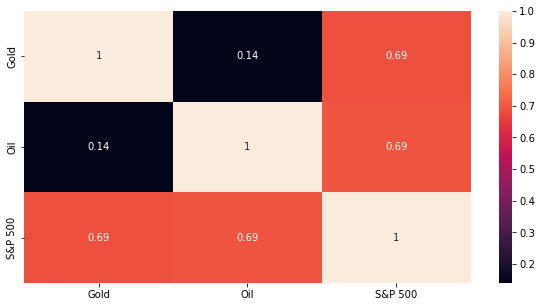

In [89]:
covid_corr = event_covid.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(covid_corr, annot=True)
covid_corr.style.background_gradient(cmap = "coolwarm").set_precision(2)

## Financial Analysis - Daily % Change

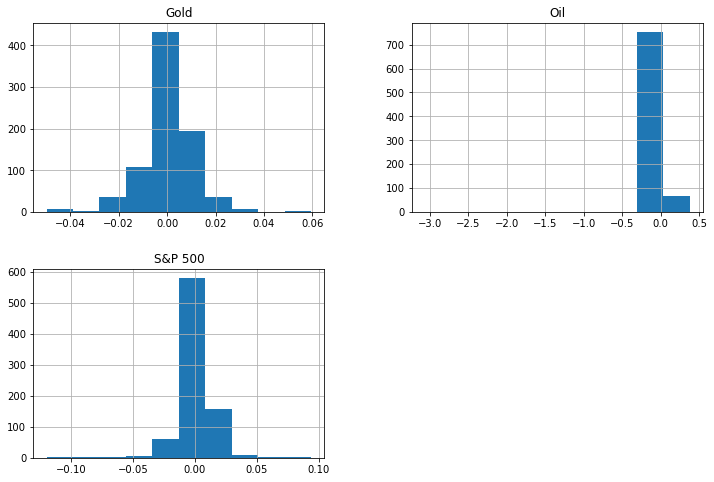

             Gold         Oil     S&P 500
count  823.000000  823.000000  823.000000
mean     0.000550   -0.002811    0.000817
std      0.010407    0.121771    0.014069
min     -0.049787   -3.059661   -0.119841
25%     -0.003777   -0.010933   -0.004031
50%      0.000937    0.002425    0.001276
75%      0.005875    0.015452    0.007203
max      0.059477    0.376623    0.093828


In [92]:
covid_pct_change = event_covid.pct_change()

# Replace NA values with zero/s
covid_pct_change.fillna(0, inplace=True)

# Plot distribution via histogram/s
covid_pct_change.hist(figsize=(12,8))
plt.show()

# Pull up summary stats in a table format
print(covid_pct_change.describe())


## Daily cumulative returns


In [93]:
# calc cum daily returns
cum_covid_return = (1+ covid_pct_change).cumprod()


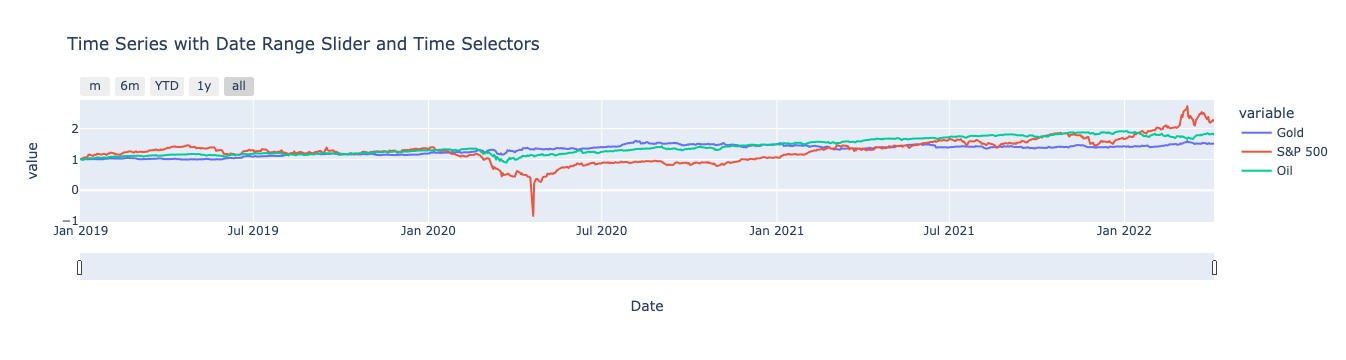

In [94]:
# Create variables & define columns
cum_df = cum_covid_return.copy()
cum_df1 = cum_df.reset_index()
cum_df1.columns=['Date','Gold',"S&P 500","Oil"]


# Interactive Chart with date slider at the bottom - cum returns
fig = px.line(df, x='Date', y=cum_df1.columns[1:4], title='Time Series with Date Range Slider and Time Selectors')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

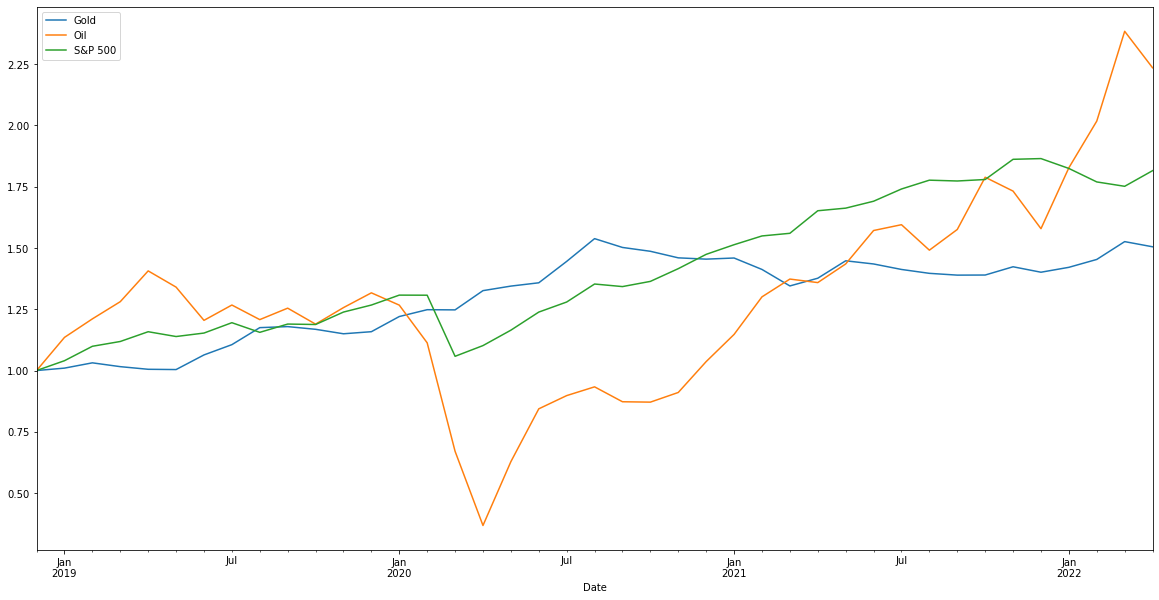

In [95]:
# Monthly Cumulative Returns

cum_monthly_covid = cum_covid_return.resample("M").mean()
cum_monthly_covid.plot(figsize = (20,10))
plt.show()


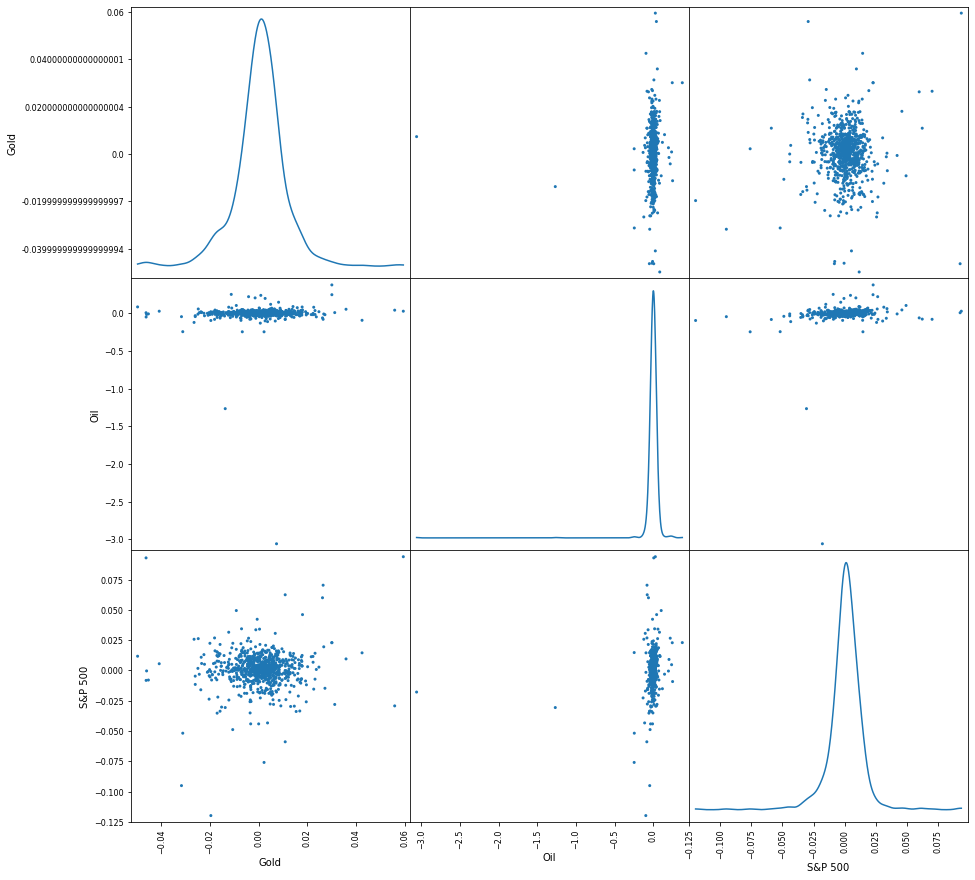

In [96]:
# Plot a scatter matrix with the daily_pct_change data 
# This shows us the return relationship and distribution of the assigned variables

pd.plotting.scatter_matrix(covid_pct_change, diagonal='kde', alpha=1,figsize=(15,15))
plt.show()

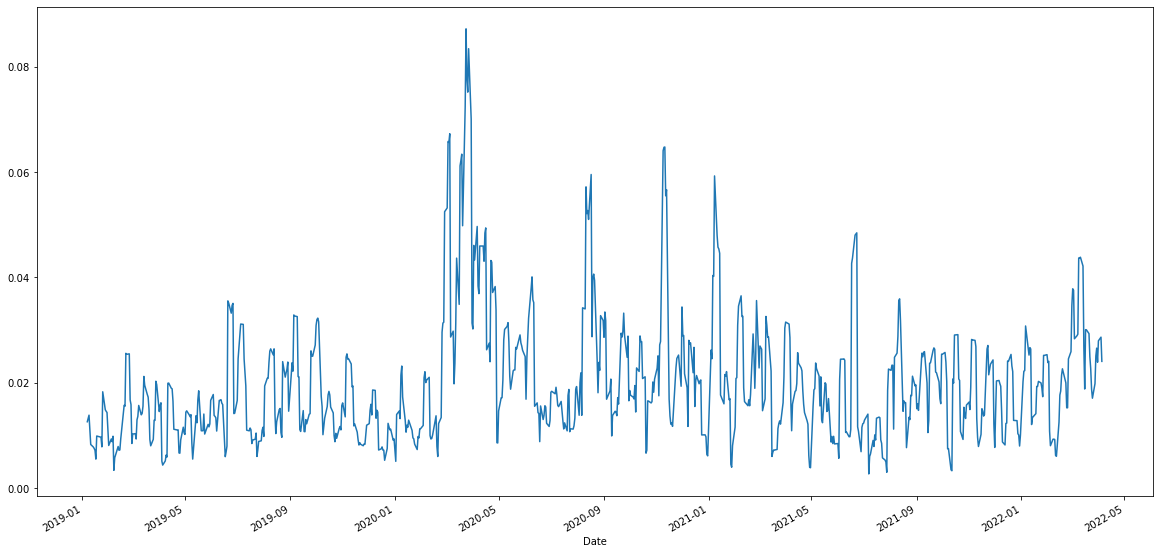

In [97]:
# Volatility Calculation (GOLD)

# Measure change in variance in the returns over a specific period of time
# The volatility is calculated by taking a rolling window standard deviation on the % change
# Gold violitility has been very significant in 2020, esp. around Covid-19 timeline as per chart below (also we can see the past financial crisis spikes)

# Define the minumum of periods
min_periods = 5

# Volatility calc
vol = covid_pct_change['Gold'].rolling(min_periods).std() * np.sqrt(min_periods) 

# Volatility plot
vol.plot(figsize=(20, 10))
plt.show()